# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [12]:
data.describe()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


In [19]:
import seaborn as sns

In [20]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='WarehouseSales'>

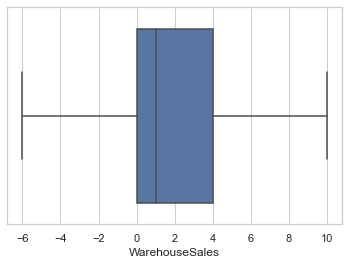

In [22]:
sns.boxplot(x=data['WarehouseSales'], showfliers=False)

<AxesSubplot:xlabel='WarehouseSales'>

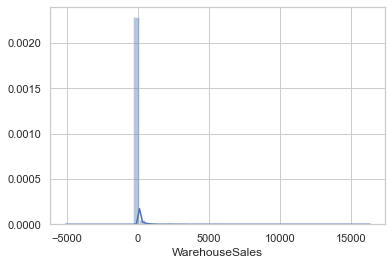

In [29]:
sns.distplot(data['WarehouseSales'])

In [27]:
data['WarehouseSales'][data['WarehouseSales'] > data['WarehouseSales'].quantile(.99)]

5908       471.00
6648      1701.00
6688      1018.50
6689       428.00
6692       490.00
           ...   
128261     445.00
128266     485.50
128271    1942.00
128305    1309.38
128320    3759.50
Name: WarehouseSales, Length: 1284, dtype: float64

<AxesSubplot:xlabel='RetailSales'>

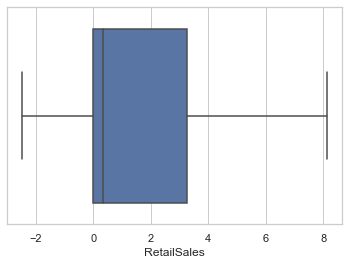

In [23]:
sns.boxplot(x=data['RetailSales'], showfliers=False)

<AxesSubplot:xlabel='RetailTransfers'>

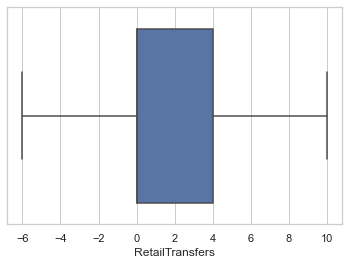

In [24]:
sns.boxplot(x=data['RetailTransfers'], showfliers=False)

<AxesSubplot:xlabel='ItemType'>

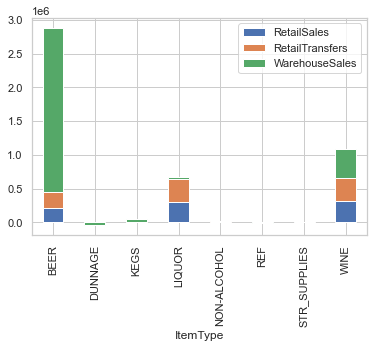

In [128]:
total_sales = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']].groupby(['ItemType']).agg('sum')
total_sales.plot.bar(stacked=True)

In [9]:
total_sales

,RetailSales,RetailTransfers,WarehouseSales
0,0.00,1.0,0.0
1,0.00,1.0,0.0
2,0.00,8.0,0.0
3,0.00,2.0,0.0
4,0.00,4.0,0.0
...,...,...,...
128350,66.46,59.0,212.0
128351,9.08,7.0,35.0
128352,0.00,0.0,32.0
128353,0.00,0.0,-35.0


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [45]:
top10_supplier = list((data.assign(total_sales=data.RetailSales + data.RetailTransfers + data.WarehouseSales)
                      .groupby('Supplier')
                      .agg('sum')
                      .sort_values(by='total_sales', ascending=False)
                      .head(10)).index)
sales_mix_top10_supplier = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'Supplier']].groupby(['Supplier']).agg('sum').loc[top10_supplier]

<AxesSubplot:ylabel='Supplier'>

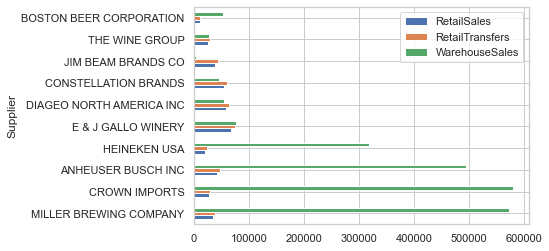

In [47]:
sales_mix_top10_supplier.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [69]:
data.Month.value_counts()

11    14532
12    14500
6     13628
10    13626
8     13590
5     13453
9     13386
1     13345
2     13100
4      5195
Name: Month, dtype: int64

<AxesSubplot:xlabel='Date'>

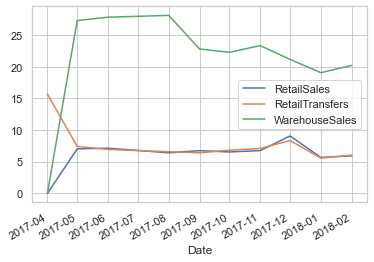

In [129]:
(data.assign(Date=pd.to_datetime(data['Year'].astype(str) + data['Month'].astype(str), format='%Y%m'))
 .groupby(['Date'])
 .agg('mean')
 .reset_index()
.plot(x='Date', y=['RetailSales', 'RetailTransfers', 'WarehouseSales']))

## 4. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Date'>

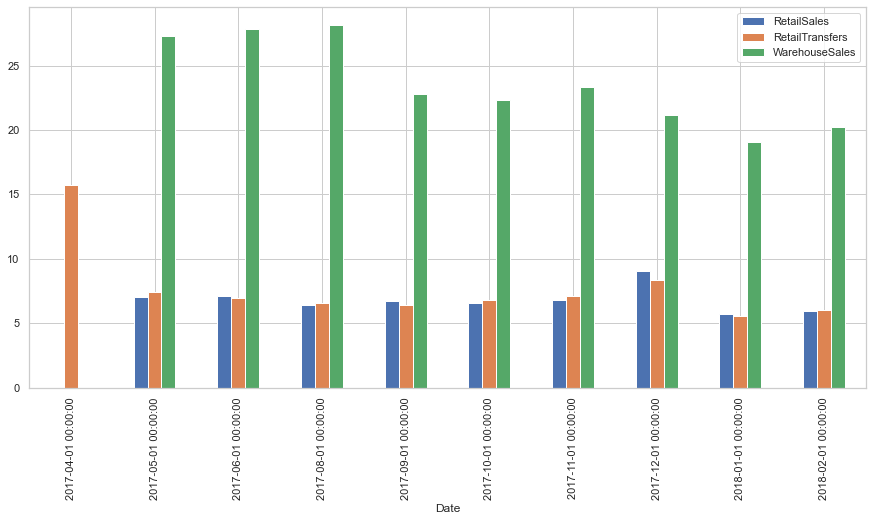

In [100]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,7))

(data.assign(Date=pd.to_datetime(data['Year'].astype(str) + data['Month'].astype(str), format='%Y%m'))
 .groupby(['Date'])
 .agg('mean')[['RetailSales', 'RetailTransfers', 'WarehouseSales']]
 .plot(ax=ax, kind='bar'))

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [132]:
item_monthly_sales = data[['RetailSales', 'ItemType', 'Year', 'Month']].groupby(['ItemType', 'Year', 'Month']).agg('sum').reset_index()#.set_index(['Year', 'Month'])


In [133]:
item_monthly_sales

,ItemType,Year,Month,RetailSales
0,BEER,2017,4,0.00
1,BEER,2017,5,25023.24
2,BEER,2017,6,27863.26
3,BEER,2017,8,23030.13
4,BEER,2017,9,23852.76
...,...,...,...,...
68,WINE,2017,10,33108.76
69,WINE,2017,11,38275.92
70,WINE,2017,12,51492.76
71,WINE,2018,1,29792.72


<AxesSubplot:xlabel='Year,Month'>

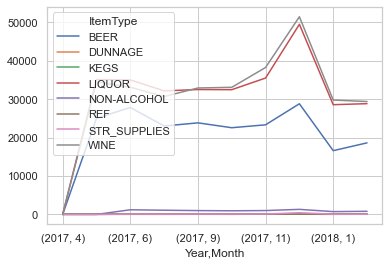

In [135]:
pd.pivot_table(item_monthly_sales, values='RetailSales', index=['Year', 'Month'], columns=['ItemType'], aggfunc='sum').fillna(0).plot()

## 6. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

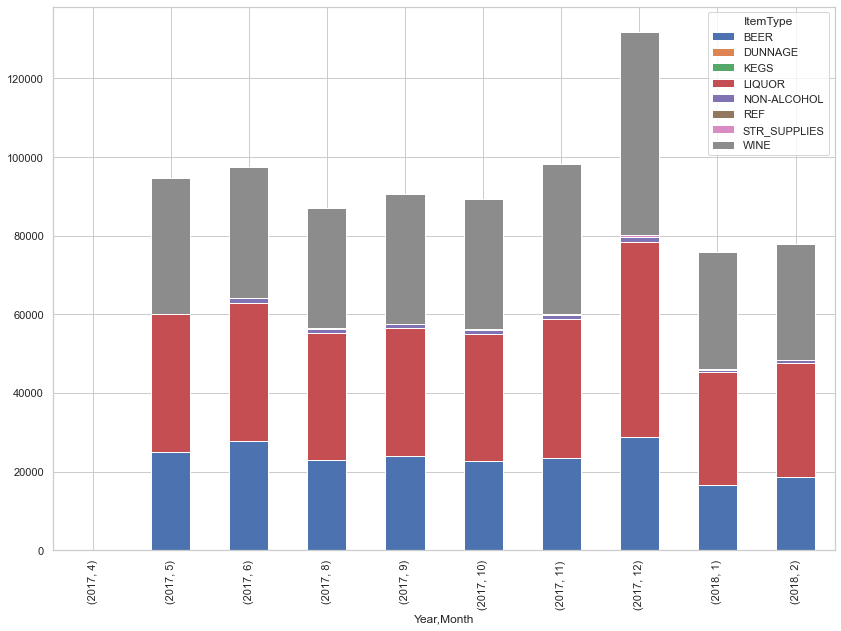

In [138]:
pd.pivot_table(item_monthly_sales, values='RetailSales', index=['Year', 'Month'], columns=['ItemType']).fillna(0).plot.bar(stacked=True, figsize=(14, 10))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [113]:
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


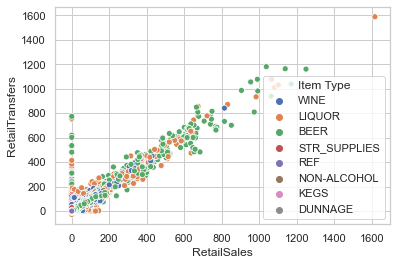

In [119]:
ax = sns.scatterplot(x="RetailSales", y="RetailTransfers", hue=data["ItemType"].values,data=data)
ax.legend(title='Item Type')  # add a title to the legend

In [139]:
data[['RetailSales', 'RetailTransfers']].corr()

,RetailSales,RetailTransfers
RetailSales,1.000000,0.943769
RetailTransfers,0.943769,1.000000


## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

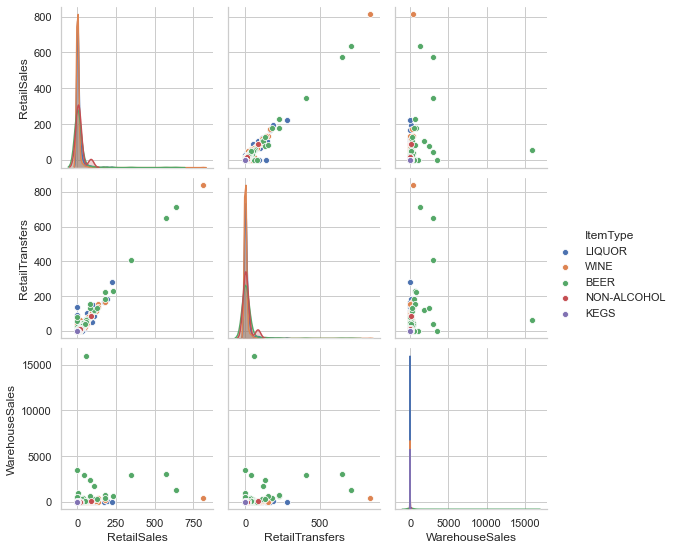

In [127]:
sns.pairplot(data.sample(2000)[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']], hue='ItemType')